# 1. Fully connected network


Bắt đầu mô phỏng 1:


Running Simulation:   0%|          | 908/1000000 [00:00<02:47, 5963.08it/s]


Hội tụ tại bước 909 với tên 'N18'



Bắt đầu mô phỏng 2:


Running Simulation:   0%|          | 1010/1000000 [00:00<04:06, 4054.04it/s]



Hội tụ tại bước 1011 với tên 'N10'

Bắt đầu mô phỏng 3:


Running Simulation:   0%|          | 1146/1000000 [00:00<02:34, 6457.09it/s]



Hội tụ tại bước 1147 với tên 'N39'

Bắt đầu mô phỏng 4:


Running Simulation:   0%|          | 1061/1000000 [00:00<03:01, 5496.52it/s]



Hội tụ tại bước 1062 với tên 'N7'

Bắt đầu mô phỏng 5:


Running Simulation:   0%|          | 1077/1000000 [00:00<03:58, 4184.53it/s]



Hội tụ tại bước 1078 với tên 'N2'


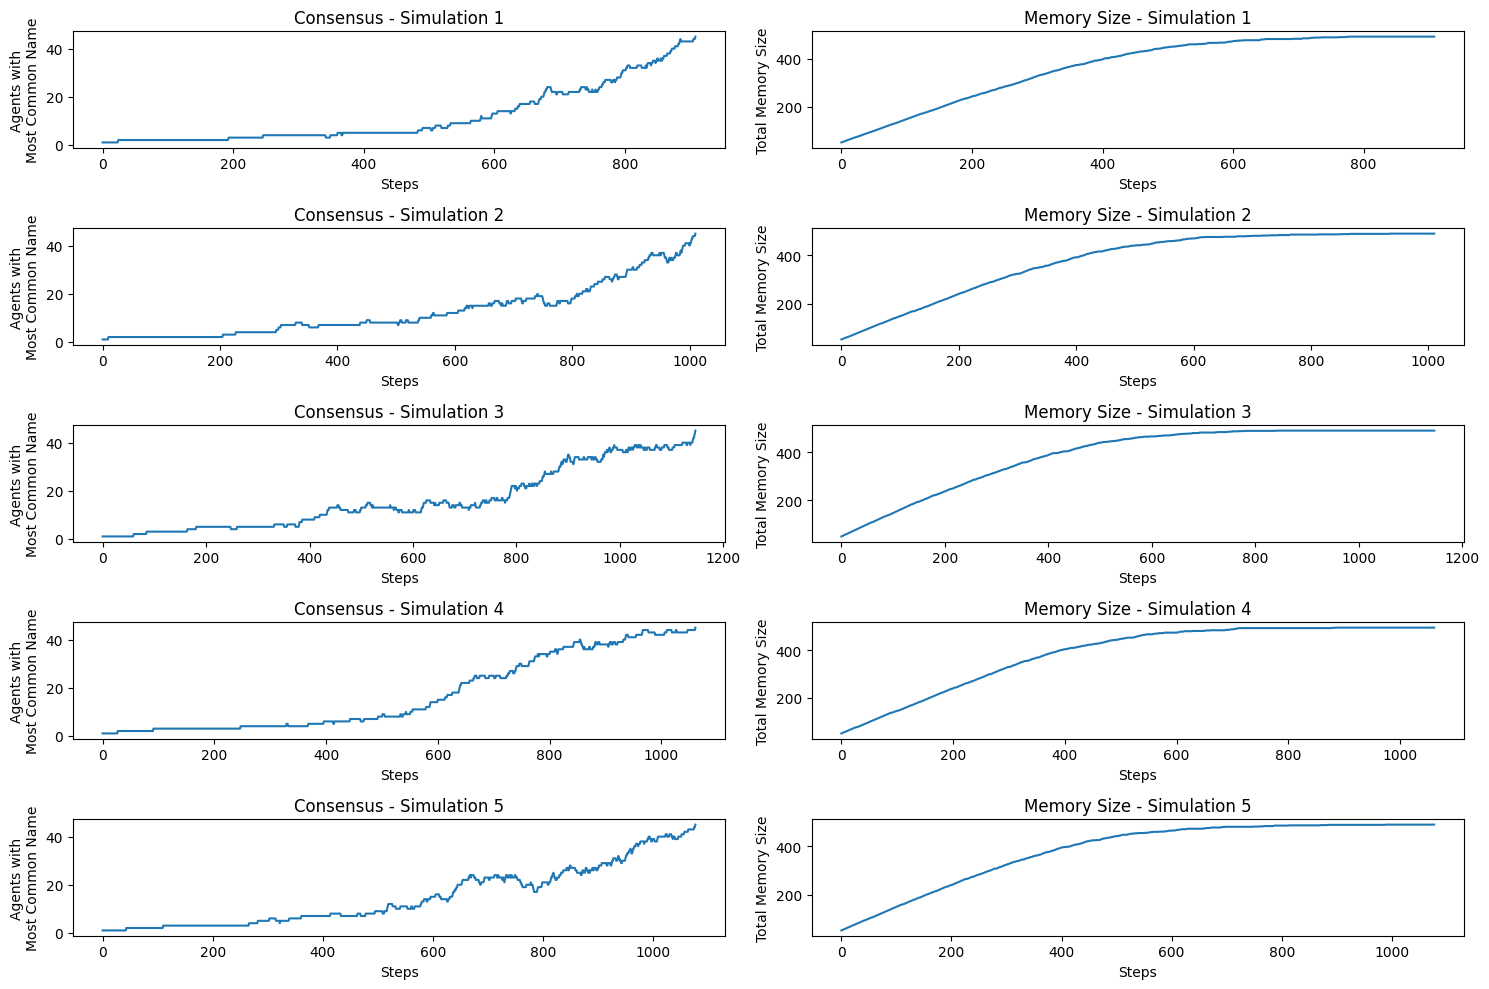

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm  # Import thư viện tqdm

class NamingGame:
    def __init__(self, num_agents=50, memory_spaces=10, max_steps=1000000):
        self.num_agents = num_agents
        self.memory_spaces = memory_spaces
        self.max_steps = max_steps

        # Initialize agents with empty memories
        self.agents = [[] for _ in range(num_agents)]

        # Track used names
        self.used_names = set()

    def generate_unique_name(self):
        # Generate a unique name
        while True:
            name = f"N{len(self.used_names)}"
            if name not in self.used_names:
                self.used_names.add(name)
                return name

    def initialize_agents(self):
        # Each agent creates a unique initial name
        for i in range(self.num_agents):
            self.agents[i].append(self.generate_unique_name())

    def select_agents(self):
        speaker = random.randint(0, self.num_agents - 1)
        hearer = random.randint(0, self.num_agents - 1)
        while speaker == hearer:
            hearer = random.randint(0, self.num_agents - 1)
        return speaker, hearer

    def run_simulation(self):
        self.initialize_agents()

        steps_data = []
        total_memory_data = []
        consensus_names = []
        convergence_step = -1  # To store the convergence step
        convergence_name = None  # To store the name at convergence
        max_percentage = 0  # Track the highest percentage of consensus

        for step in tqdm(range(self.max_steps), desc="Running Simulation"):
            # Select speaker and hearer
            speaker, hearer = self.select_agents()

            # Initialize action log
            action = "Không có hành động."

            # If speaker's memory is empty, create a new name
            if not self.agents[speaker]:
                self.agents[speaker].append(self.generate_unique_name())

            # Select a name from speaker's memory
            name = self.agents[speaker][0]

            # Hearer update logic
            if name in self.agents[hearer]:
                # Move successful name to front
                self.agents[hearer].remove(name)
                self.agents[hearer].insert(0, name)
                action = f"Tên '{name}' được chấp nhận bởi Hearer."
            else:
                # Add name to hearer's memory if space available
                if len(self.agents[hearer]) < self.memory_spaces:
                    self.agents[hearer].append(name)
                    action = f"Tên '{name}' được thêm vào bộ nhớ của Hearer."
                else:
                    # If memory full, replace last name
                    removed_name = self.agents[hearer].pop()
                    self.agents[hearer].append(name)
                    action = (f"Tên '{name}' được thêm vào bộ nhớ của Hearer. "
                              f"Tên cũ '{removed_name}' bị xóa do bộ nhớ đầy.")

            # Track consensus and memory size
            most_common_name = max(
                set(agent[0] if agent else None for agent in self.agents),
                key=lambda x: sum(1 for agent in self.agents if agent and agent[0] == x),
            )

            consensus_count = sum(1 for agent in self.agents
                                  if agent and agent[0] == most_common_name)

            # Update max consensus percentage
            percentage = (consensus_count / self.num_agents) * 100
            max_percentage = max(max_percentage, percentage)

            steps_data.append(step)
            consensus_names.append(consensus_count)
            total_memory = sum(len(agent) for agent in self.agents)
            total_memory_data.append(total_memory)

            # # Print details for the first 100 steps
            # if step < 100:
            #     print(f"\nBước {step + 1}:")
            #     print(f"  Speaker: Agent {speaker} (Tên: {self.agents[speaker][0]})")
            #     print(f"  Hearer: Agent {hearer} (Tên: {self.agents[hearer][0] if self.agents[hearer] else 'Chưa có tên'})")
            #     print(f"  Hành động: {action}")
            #     print(f"  Tổng dung lượng bộ nhớ: {total_memory}")
            #     for i, mem in enumerate(self.agents):
            #         print(f"  Agent {i} memory: {mem}")

            # Check for 90% consensus
            if consensus_count >= 0.9 * self.num_agents:
                if convergence_step == -1:  # Only store the first convergence
                    convergence_step = step
                    convergence_name = most_common_name
                break

        # Final results
        if convergence_step != -1:
            print(f"\nHội tụ tại bước {convergence_step + 1} với tên '{convergence_name}'")
        else:
            print(f"\nKhông hội tụ. Phần trăm cao nhất đạt được: {max_percentage:.2f}%")

        return steps_data, consensus_names, total_memory_data


# Run 5 simulations
np.random.seed(42)
num_sims = 5

plt.figure(figsize=(15, 10))

for i in range(num_sims):
    print(f"\nBắt đầu mô phỏng {i + 1}:")
    naming_game = NamingGame()
    steps, consensus, memory_size = naming_game.run_simulation()

    # Plot consensus for this simulation
    plt.subplot(num_sims, 2, 2 * i + 1)
    plt.plot(steps, consensus)
    plt.title(f'Consensus - Simulation {i + 1}')
    plt.xlabel('Steps')
    plt.ylabel('Agents with\nMost Common Name')

    # Plot memory size for this simulation
    plt.subplot(num_sims, 2, 2 * i + 2)
    plt.plot(steps, memory_size)
    plt.title(f'Memory Size - Simulation {i + 1}')
    plt.xlabel('Steps')
    plt.ylabel('Total Memory Size')

plt.tight_layout()
plt.show()


## 1.1 Optimize

Hearer Memory Update Method:
+ Store the most frequently used names at the top of the list, reducing the chance of replacement.
+ Instead of removing the last name, remove the least popular name in the entire system.
Speaker Name Selection:

Prioritize the most popular name (most frequently appearing).
+ If no popular name exists, choose the first name in memory. (Ensure only a maximum of 1 popular name per step).

Interaction Method:
+ Each step selects 3 people, interact in a circular manner: Person 1 speaks to Person 2, Person 2 speaks to Person 3, Person 3 speaks to Person 1.



Bắt đầu mô phỏng 1:


Running Simulation:   0%|          | 47/1000000 [00:00<04:36, 3612.60it/s]



Hội tụ tại bước 48 với tên 'N10'

Bắt đầu mô phỏng 2:


Running Simulation:   0%|          | 43/1000000 [00:00<04:16, 3905.56it/s]



Hội tụ tại bước 44 với tên 'N7'

Bắt đầu mô phỏng 3:


Running Simulation:   0%|          | 34/1000000 [00:00<06:47, 2452.26it/s]



Hội tụ tại bước 35 với tên 'N15'

Bắt đầu mô phỏng 4:


Running Simulation:   0%|          | 34/1000000 [00:00<05:46, 2883.03it/s]



Hội tụ tại bước 35 với tên 'N43'

Bắt đầu mô phỏng 5:


Running Simulation:   0%|          | 45/1000000 [00:00<04:10, 3998.47it/s]



Hội tụ tại bước 46 với tên 'N39'


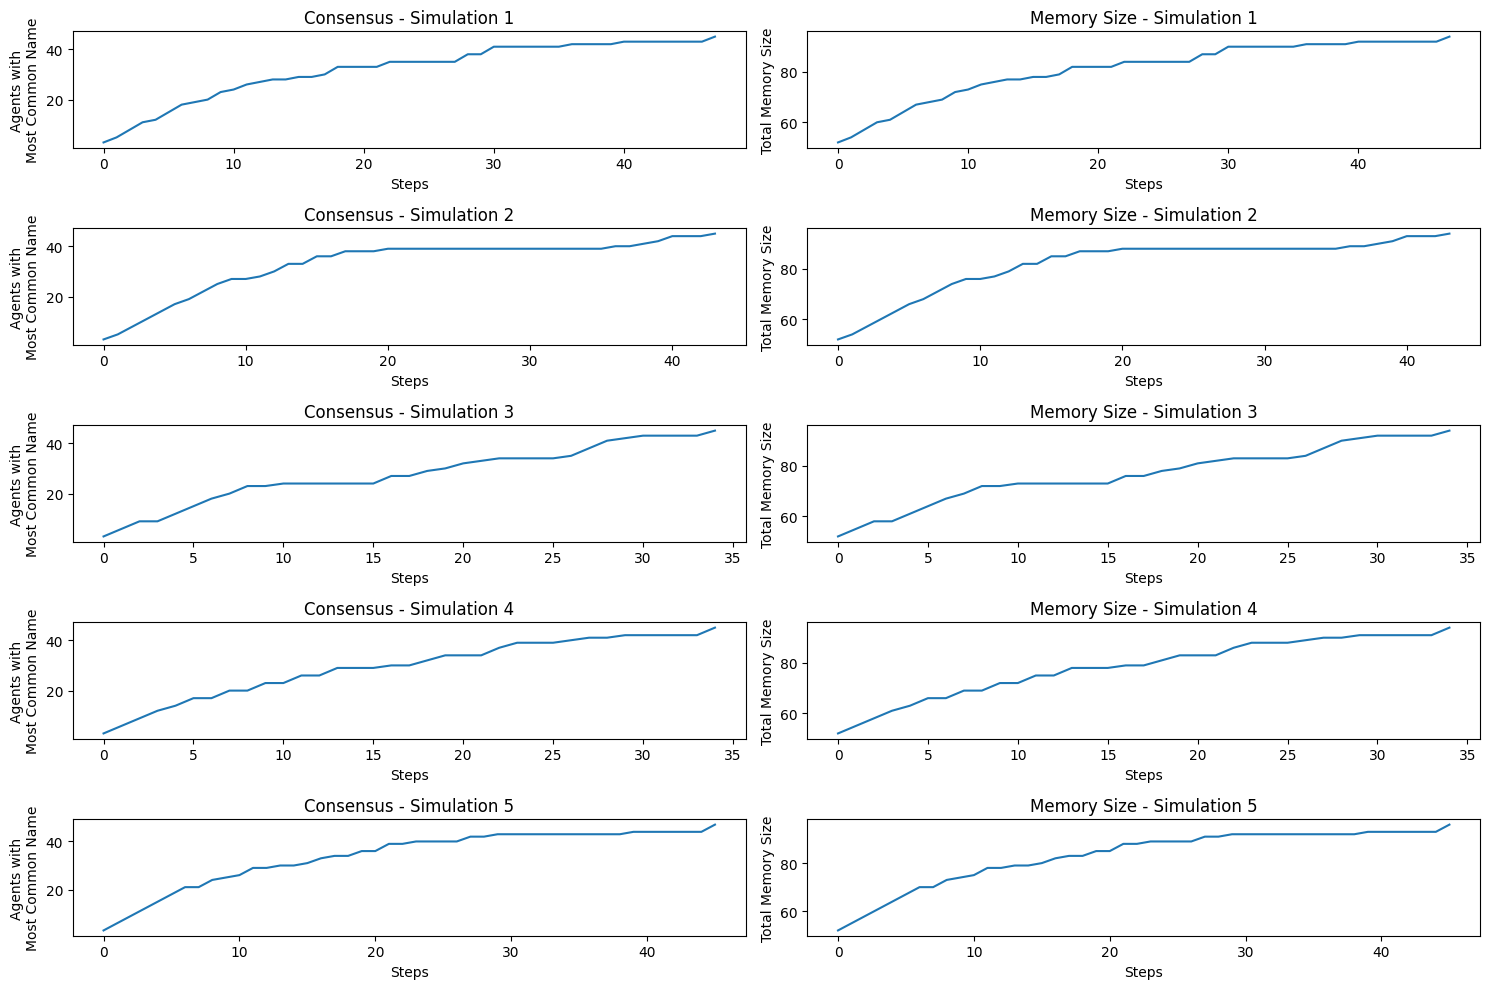

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm  # Import thư viện tqdm

class NamingGame:
    def __init__(self, num_agents=50, memory_spaces=10, max_steps=1000000):
        self.num_agents = num_agents
        self.memory_spaces = memory_spaces
        self.max_steps = max_steps

        # Initialize agents with empty memories
        self.agents = [[] for _ in range(num_agents)]

        # Track used names
        self.used_names = set()

    def generate_unique_name(self):
        """Generate a unique name."""
        while True:
            name = f"N{len(self.used_names)}"
            if name not in self.used_names:
                self.used_names.add(name)
                return name

    def initialize_agents(self):
        """Initialize agents with unique names."""
        for i in range(self.num_agents):
            self.agents[i].append(self.generate_unique_name())

    def select_agents(self):
        """Select 3 consecutive agents for circular interaction."""
        start = random.randint(0, self.num_agents - 3)
        return [start, start + 1, start + 2]

    def get_name_popularity(self):
        """Get the most common names in the system."""
        all_names = [agent[0] if agent else None for agent in self.agents]
        name_counts = {name: all_names.count(name) for name in set(all_names) if name}
        return name_counts

    def run_simulation(self):
        """Run the Naming Game simulation."""
        self.initialize_agents()

        steps_data = []
        total_memory_data = []
        consensus_names = []
        convergence_step = -1  # To store the convergence step
        convergence_name = None  # To store the name at convergence
        max_percentage = 0  # Track the highest percentage of consensus

        for step in tqdm(range(self.max_steps), desc="Running Simulation"):
            # Select 3 consecutive agents
            agents = self.select_agents()

            # Action log
            action = "Không có hành động."

            # Step 1: Select a name for the speaker
            most_common_names = sorted(self.get_name_popularity().items(), key=lambda x: x[1], reverse=True)
            if most_common_names and most_common_names[0][1] > 1:
                # If there's a popular name, speaker chooses it
                name = most_common_names[0][0]
            else:
                # Otherwise, select the first name in speaker's memory
                name = self.agents[agents[0]][0]

            # Step 2: Perform the circular interaction: speaker -> hearer -> next hearer -> back to speaker
            for i in range(3):
                speaker_idx = agents[i]
                hearer_idx = agents[(i + 1) % 3]

                # If the hearer's memory doesn't contain the name, add it
                if name in self.agents[hearer_idx]:
                    self.agents[hearer_idx].remove(name)
                    self.agents[hearer_idx].insert(0, name)
                else:
                    if len(self.agents[hearer_idx]) < self.memory_spaces:
                        self.agents[hearer_idx].append(name)
                    else:
                        # Remove least common name (least popular name)
                        name_popularity = self.get_name_popularity()
                        least_popular_name = min(name_popularity, key=name_popularity.get)
                        self.agents[hearer_idx].remove(least_popular_name)
                        self.agents[hearer_idx].append(name)

                # Speaker updates: Move the name to the front of their memory
                if name not in self.agents[speaker_idx]:
                    self.agents[speaker_idx].append(name)
                self.agents[speaker_idx].remove(name)
                self.agents[speaker_idx].insert(0, name)

            # Track consensus and memory size
            most_common_name = max(
                set(agent[0] if agent else None for agent in self.agents),
                key=lambda x: sum(1 for agent in self.agents if agent and agent[0] == x),
            )
            consensus_count = sum(1 for agent in self.agents if agent and agent[0] == most_common_name)

            # Update max consensus percentage
            percentage = (consensus_count / self.num_agents) * 100
            max_percentage = max(max_percentage, percentage)

            steps_data.append(step)
            consensus_names.append(consensus_count)
            total_memory = sum(len(agent) for agent in self.agents)
            total_memory_data.append(total_memory)

            # Check for 90% consensus
            if consensus_count >= 0.9 * self.num_agents:
                if convergence_step == -1:  # Only store the first convergence
                    convergence_step = step
                    convergence_name = most_common_name
                break

        # Final results
        if convergence_step != -1:
            print(f"\nHội tụ tại bước {convergence_step + 1} với tên '{convergence_name}'")
        else:
            print(f"\nKhông hội tụ. Phần trăm cao nhất đạt được: {max_percentage:.2f}%")

        return steps_data, consensus_names, total_memory_data


# Run 5 simulations
np.random.seed(42)
num_sims = 5

plt.figure(figsize=(15, 10))

for i in range(num_sims):
    print(f"\nBắt đầu mô phỏng {i + 1}:")
    naming_game = NamingGame()
    steps, consensus, memory_size = naming_game.run_simulation()

    # Plot consensus for this simulation
    plt.subplot(num_sims, 2, 2 * i + 1)
    plt.plot(steps, consensus)
    plt.title(f'Consensus - Simulation {i + 1}')
    plt.xlabel('Steps')
    plt.ylabel('Agents with\nMost Common Name')

    # Plot memory size for this simulation
    plt.subplot(num_sims, 2, 2 * i + 2)
    plt.plot(steps, memory_size)
    plt.title(f'Memory Size - Simulation {i + 1}')
    plt.xlabel('Steps')
    plt.ylabel('Total Memory Size')

plt.tight_layout()
plt.show()


# 2. A lattice network with 50 nodes, neighbourhood size 2

Running Simulation:   2%|▏         | 16169/1000000 [00:00<00:59, 16435.80it/s]



Hội tụ tại bước 16170 với tên 'N4'


Running Simulation:   2%|▏         | 22091/1000000 [00:00<00:15, 61249.64it/s]



Hội tụ tại bước 22092 với tên 'N0'


Running Simulation:   2%|▏         | 16682/1000000 [00:00<00:17, 56092.27it/s]



Hội tụ tại bước 16683 với tên 'N44'


Running Simulation:   2%|▏         | 19651/1000000 [00:00<00:17, 55706.30it/s]



Hội tụ tại bước 19652 với tên 'N45'


Running Simulation:   1%|▏         | 14459/1000000 [00:00<00:17, 55586.92it/s]



Hội tụ tại bước 14460 với tên 'N16'


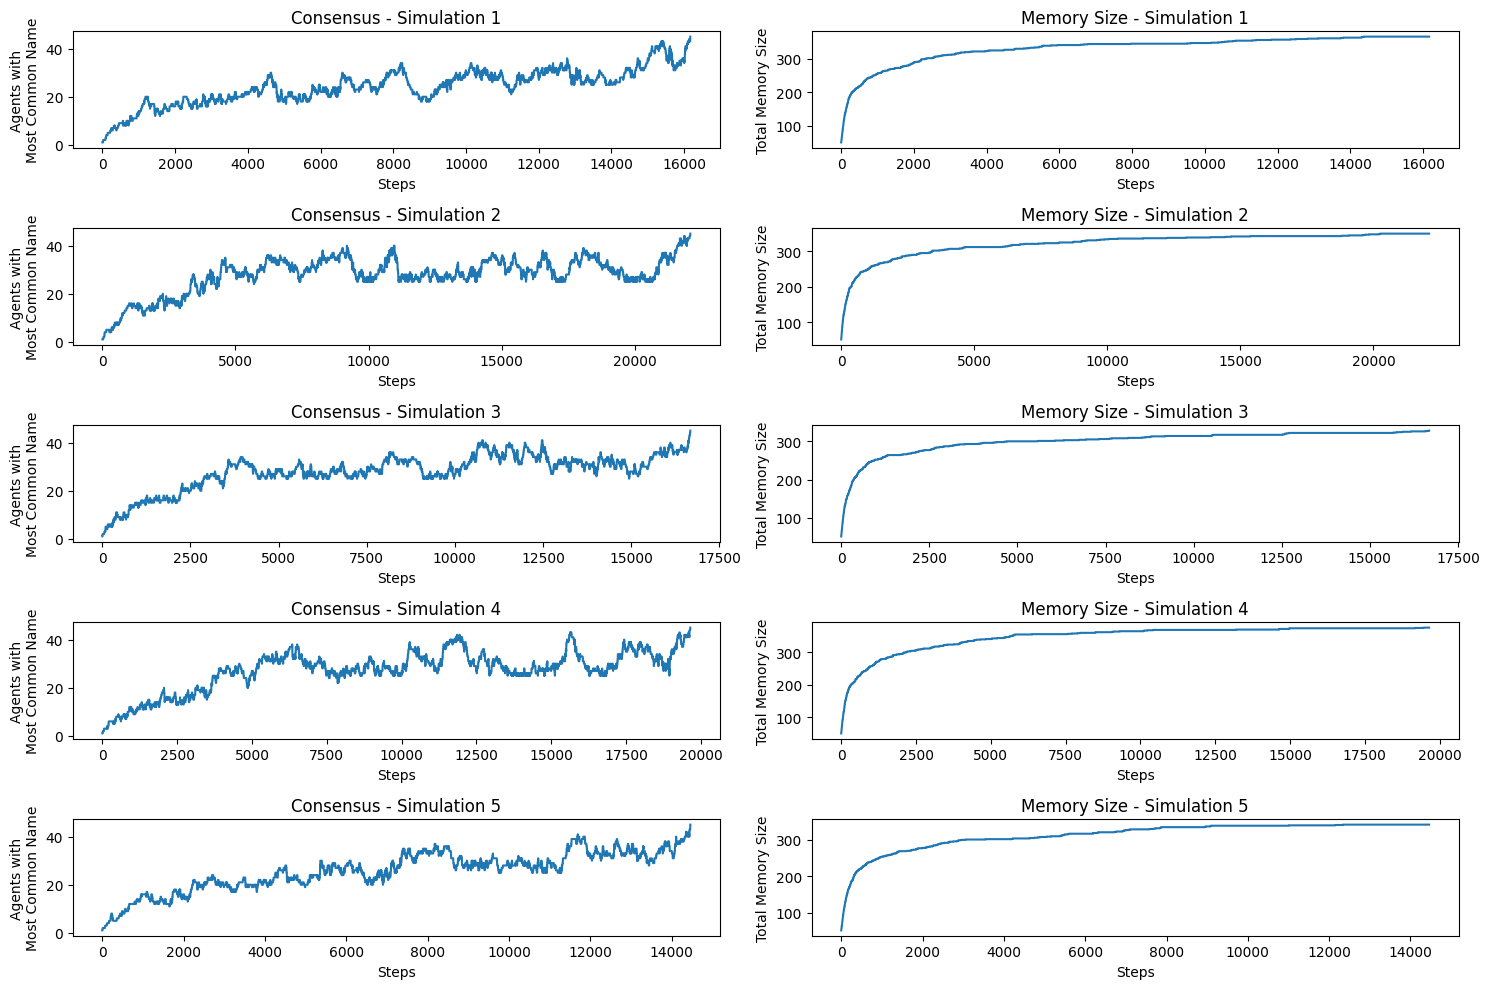

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm  # Import thư viện tqdm

class NamingGame:
    def __init__(self, num_agents=50, memory_spaces=10, max_steps=1000000, neighborhood_size=2):
        self.num_agents = num_agents
        self.memory_spaces = memory_spaces
        self.max_steps = max_steps
        self.neighborhood_size = neighborhood_size

        # Initialize agents with empty memories
        self.agents = [[] for _ in range(num_agents)]

        # Track used names
        self.used_names = set()

    def get_neighbors(self, agent_idx):
        """Get neighbors in lattice network with periodic boundary conditions."""
        neighbors = []
        for i in range(-self.neighborhood_size, self.neighborhood_size + 1):
            if i != 0:  # Exclude self
                neighbor_idx = (agent_idx + i) % self.num_agents
                neighbors.append(neighbor_idx)
        return neighbors

    def generate_unique_name(self):
        """Generate a unique name."""
        while True:
            name = f"N{len(self.used_names)}"
            if name not in self.used_names:
                self.used_names.add(name)
                return name

    def initialize_agents(self):
        """Initialize agents with unique names."""
        for i in range(self.num_agents):
            self.agents[i].append(self.generate_unique_name())

    def select_agents(self):
        """Randomly select a speaker and a hearer from neighbors."""
        speaker = random.randint(0, self.num_agents - 1)
        neighbors = self.get_neighbors(speaker)
        hearer = random.choice(neighbors)
        return speaker, hearer

    def run_simulation(self):
        """Run the Naming Game simulation."""
        self.initialize_agents()

        steps_data = []
        total_memory_data = []
        consensus_names = []
        convergence_step = -1  # To store the convergence step
        convergence_name = None  # To store the name at convergence

        for step in tqdm(range(self.max_steps), desc="Running Simulation"):
            # Select speaker and hearer
            speaker, hearer = self.select_agents()

            # If speaker's memory is empty, create a new name
            if not self.agents[speaker]:
                self.agents[speaker].append(self.generate_unique_name())

            # Select a name from speaker's first memory space
            name = self.agents[speaker][0]

            # Hearer update
            if name in self.agents[hearer]:
                # Move successful name to front
                self.agents[hearer].remove(name)
                self.agents[hearer].insert(0, name)

                # Speaker update - move successful name to front
                self.agents[speaker].remove(name)
                self.agents[speaker].insert(0, name)
            else:
                # Add name to hearer's memory if space available
                if len(self.agents[hearer]) < self.memory_spaces:
                    self.agents[hearer].append(name)
                else:
                    # If memory full, replace last name
                    self.agents[hearer].pop()
                    self.agents[hearer].append(name)

            # Track consensus and memory size
            first_names = [agent[0] if agent else None for agent in self.agents]
            unique_names = set(first_names)
            most_common_name = max(unique_names,
                                 key=lambda x: first_names.count(x))
            consensus_count = first_names.count(most_common_name)

            steps_data.append(step)
            consensus_names.append(consensus_count)
            total_memory_data.append(sum(len(agent) for agent in self.agents))

            # Check for 90% consensus
            if consensus_count >= 0.9 * self.num_agents:
                if convergence_step == -1:  # Only store the first convergence
                    convergence_step = step
                    convergence_name = most_common_name
                break

        # Print convergence details
        if convergence_step != -1:
            print(f"\nHội tụ tại bước {convergence_step + 1} với tên '{convergence_name}'")
        else:
            print(f"\nKhông hội tụ. Phần trăm cao nhất đạt được: {max(consensus_names) / self.num_agents * 100:.2f}%")

        return steps_data, consensus_names, total_memory_data


# Run 5 simulations
np.random.seed(42)
num_sims = 5

plt.figure(figsize=(15, 10))

for i in range(num_sims):
    naming_game = NamingGame()
    steps, consensus, memory_size = naming_game.run_simulation()

    # Plot consensus for this simulation
    plt.subplot(num_sims, 2, 2*i + 1)
    plt.plot(steps, consensus)
    plt.title(f'Consensus - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Agents with\nMost Common Name')

    # Plot memory size for this simulation
    plt.subplot(num_sims, 2, 2*i + 2)
    plt.plot(steps, memory_size)
    plt.title(f'Memory Size - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Total Memory Size')

plt.tight_layout()
plt.show()


## 2.1 Optimize

Hearer Memory Update Method:
+ Store the most frequently used names at the top of the list, reducing the chance of replacement.
+ Instead of removing the last name, remove the least popular name in the entire system.
Speaker Name Selection:

Prioritize the most popular name (most frequently appearing).
+ If no popular name exists, choose the first name in memory. (Ensure only a maximum of 1 popular name per step).

Interaction Method:
+ Each step selects 3 people, interact in a circular manner: Person 1 speaks to Person 2, Person 2 speaks to Person 3, Person 3 speaks to Person 1.


Running Simulation:   0%|          | 248/1000000 [00:00<04:49, 3447.74it/s]



Hội tụ tại bước 249 với tên 'N29'


Running Simulation:   0%|          | 216/1000000 [00:00<03:06, 5346.97it/s]



Hội tụ tại bước 217 với tên 'N35'


Running Simulation:   0%|          | 300/1000000 [00:00<02:47, 5972.92it/s]



Hội tụ tại bước 301 với tên 'N18'


Running Simulation:   0%|          | 297/1000000 [00:00<03:06, 5356.80it/s]



Hội tụ tại bước 298 với tên 'N20'


Running Simulation:   0%|          | 345/1000000 [00:00<02:36, 6382.42it/s]



Hội tụ tại bước 346 với tên 'N36'


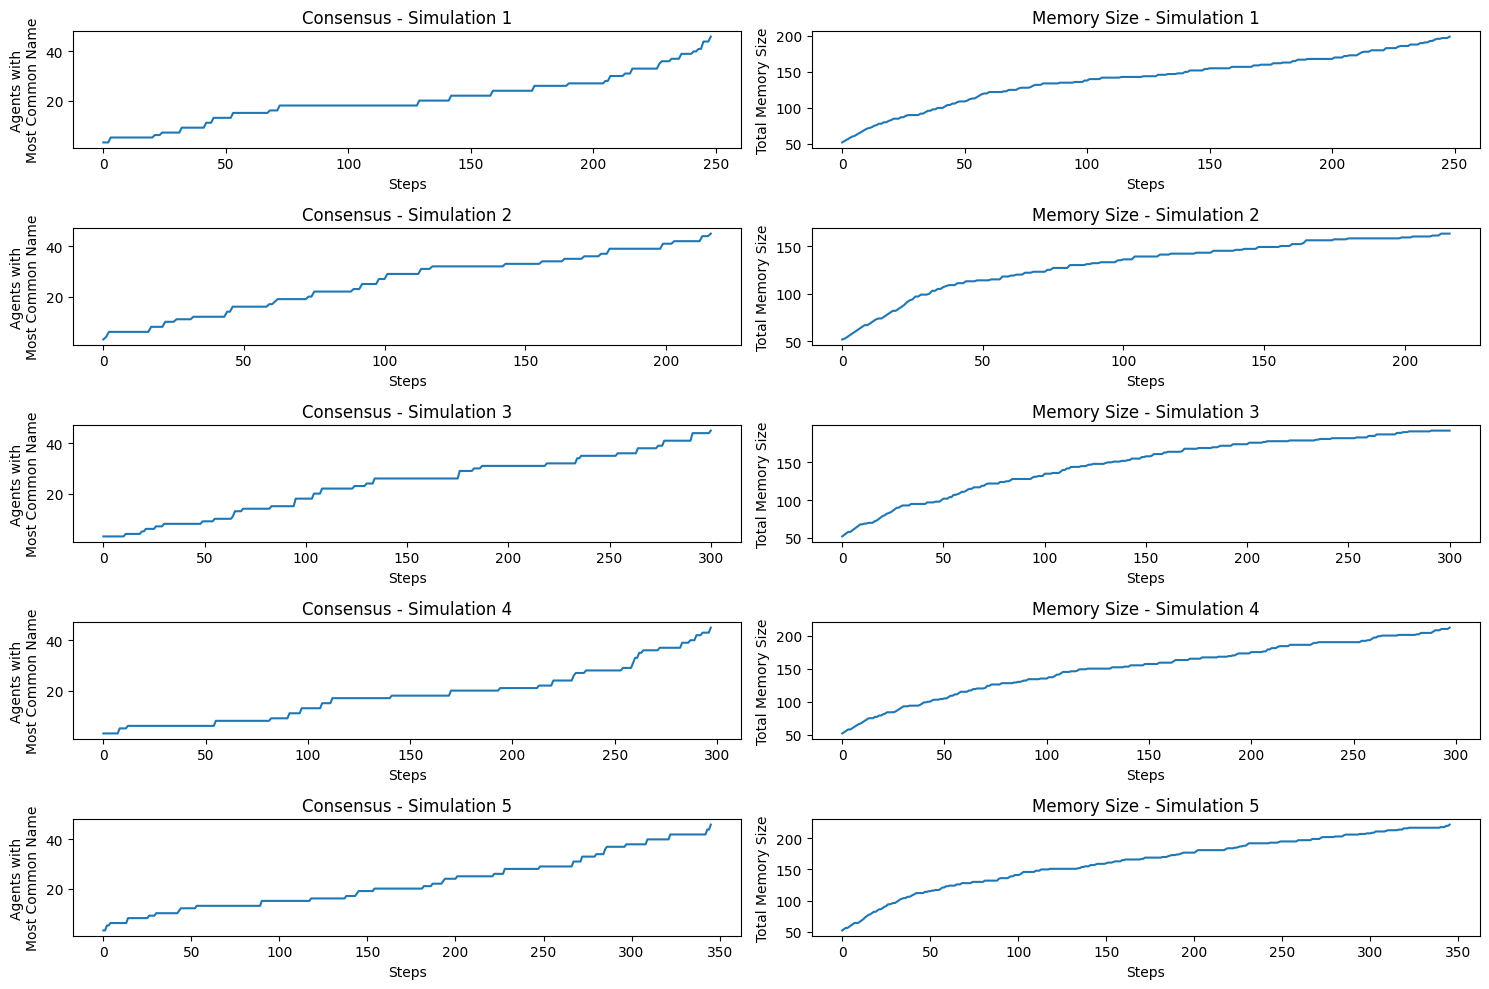

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm  # Import thư viện tqdm

class NamingGame:
    def __init__(self, num_agents=50, memory_spaces=10, max_steps=1000000, neighborhood_size=2):
        self.num_agents = num_agents
        self.memory_spaces = memory_spaces
        self.max_steps = max_steps
        self.neighborhood_size = neighborhood_size

        # Initialize agents with empty memories
        self.agents = [[] for _ in range(num_agents)]

        # Track used names
        self.used_names = set()

    def get_neighbors(self, agent_idx):
        """Get neighbors in lattice network with periodic boundary conditions."""
        neighbors = []
        for i in range(-self.neighborhood_size, self.neighborhood_size + 1):
            if i != 0:  # Exclude self
                neighbor_idx = (agent_idx + i) % self.num_agents
                neighbors.append(neighbor_idx)
        return neighbors

    def generate_unique_name(self):
        """Generate a unique name."""
        while True:
            name = f"N{len(self.used_names)}"
            if name not in self.used_names:
                self.used_names.add(name)
                return name

    def initialize_agents(self):
        """Initialize agents with unique names."""
        for i in range(self.num_agents):
            self.agents[i].append(self.generate_unique_name())

    def select_agents(self):
        """Select 3 consecutive agents in a circular manner."""
        # Randomly choose a starting point
        start_idx = random.randint(0, self.num_agents - 1)
        # Get the 3 consecutive agents
        agents = [(start_idx + i) % self.num_agents for i in range(3)]
        return agents

    def update_hearers_memory(self, hearer, name):
        """Update the hearer's memory with the most common name, prioritizing removal of the least common name."""
        # Count occurrences of names across all agents
        all_names = [agent[0] for agent in self.agents if agent]  # Get all first names
        name_counts = {name: all_names.count(name) for name in set(all_names)}

        # Remove the least common name from hearer's memory if memory is full
        if len(self.agents[hearer]) >= self.memory_spaces:
            # Find the least common name in the entire system
            least_common_name = min(name_counts, key=name_counts.get)
            if least_common_name in self.agents[hearer]:
                self.agents[hearer].remove(least_common_name)

        # Add the new name to the front of the hearer's memory
        self.agents[hearer].insert(0, name)

    def run_simulation(self):
        """Run the Naming Game simulation."""
        self.initialize_agents()

        steps_data = []
        total_memory_data = []
        consensus_names = []
        convergence_step = -1  # To store the convergence step
        convergence_name = None  # To store the name at convergence

        for step in tqdm(range(self.max_steps), desc="Running Simulation"):
            # Select 3 consecutive agents
            agents = self.select_agents()

            # Each agent will interact in a circle: agent 1 -> agent 2 -> agent 3 -> agent 1
            for i in range(3):
                speaker = agents[i]
                hearer = agents[(i + 1) % 3]

                # If speaker's memory is empty, create a new name
                if not self.agents[speaker]:
                    self.agents[speaker].append(self.generate_unique_name())

                # Determine top 1 most popular names
                first_names = [agent[0] if agent else None for agent in self.agents]
                unique_names = set(first_names)
                name_counts = {name: first_names.count(name) for name in unique_names if name}
                top_names = sorted(name_counts.keys(), key=lambda x: -name_counts[x])[:1]

                # Speaker selects a name, prioritizing common names
                speaker_memory = self.agents[speaker]
                name = next((n for n in speaker_memory if n in top_names), speaker_memory[0])

                # Hearer update
                if name in self.agents[hearer]:
                    # Move successful name to front
                    self.agents[hearer].remove(name)
                    self.agents[hearer].insert(0, name)

                    # Speaker update - move successful name to front
                    self.agents[speaker].remove(name)
                    self.agents[speaker].insert(0, name)
                else:
                    # Add name to hearer's memory, possibly removing least popular
                    self.update_hearers_memory(hearer, name)

            # Track consensus and memory size
            first_names = [agent[0] if agent else None for agent in self.agents]
            unique_names = set(first_names)
            most_common_name = max(unique_names, key=lambda x: first_names.count(x))
            consensus_count = first_names.count(most_common_name)

            steps_data.append(step)
            consensus_names.append(consensus_count)
            total_memory_data.append(sum(len(agent) for agent in self.agents))

            # Check for 90% consensus
            if consensus_count >= 0.9 * self.num_agents:
                if convergence_step == -1:  # Only store the first convergence
                    convergence_step = step
                    convergence_name = most_common_name
                break

        # Print convergence details
        if convergence_step != -1:
            print(f"\nHội tụ tại bước {convergence_step + 1} với tên '{convergence_name}'")
        else:
            print(f"\nKhông hội tụ. Phần trăm cao nhất đạt được: {max(consensus_names) / self.num_agents * 100:.2f}%")

        return steps_data, consensus_names, total_memory_data


# Run 5 simulations
np.random.seed(42)
num_sims = 5

plt.figure(figsize=(15, 10))

for i in range(num_sims):
    naming_game = NamingGame()
    steps, consensus, memory_size = naming_game.run_simulation()

    # Plot consensus for this simulation
    plt.subplot(num_sims, 2, 2*i + 1)
    plt.plot(steps, consensus)
    plt.title(f'Consensus - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Agents with\nMost Common Name')

    # Plot memory size for this simulation
    plt.subplot(num_sims, 2, 2*i + 2)
    plt.plot(steps, memory_size)
    plt.title(f'Memory Size - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Total Memory Size')

plt.tight_layout()
plt.show()


# 3. A lattice network with 50 nodes, neighbourhood size 2, 10 random connections

Running Simulation:   0%|          | 3895/1000000 [00:00<00:43, 22789.72it/s]



Hội tụ tại bước 3896 với tên 'N18'


Running Simulation:   0%|          | 4031/1000000 [00:00<01:16, 13065.32it/s]



Hội tụ tại bước 4032 với tên 'N5'


Running Simulation:   0%|          | 3807/1000000 [00:00<01:00, 16433.90it/s]



Hội tụ tại bước 3808 với tên 'N26'


Running Simulation:   1%|          | 9317/1000000 [00:00<00:47, 20873.89it/s]



Hội tụ tại bước 9318 với tên 'N44'


Running Simulation:   1%|          | 5136/1000000 [00:00<01:04, 15321.40it/s]



Hội tụ tại bước 5137 với tên 'N20'


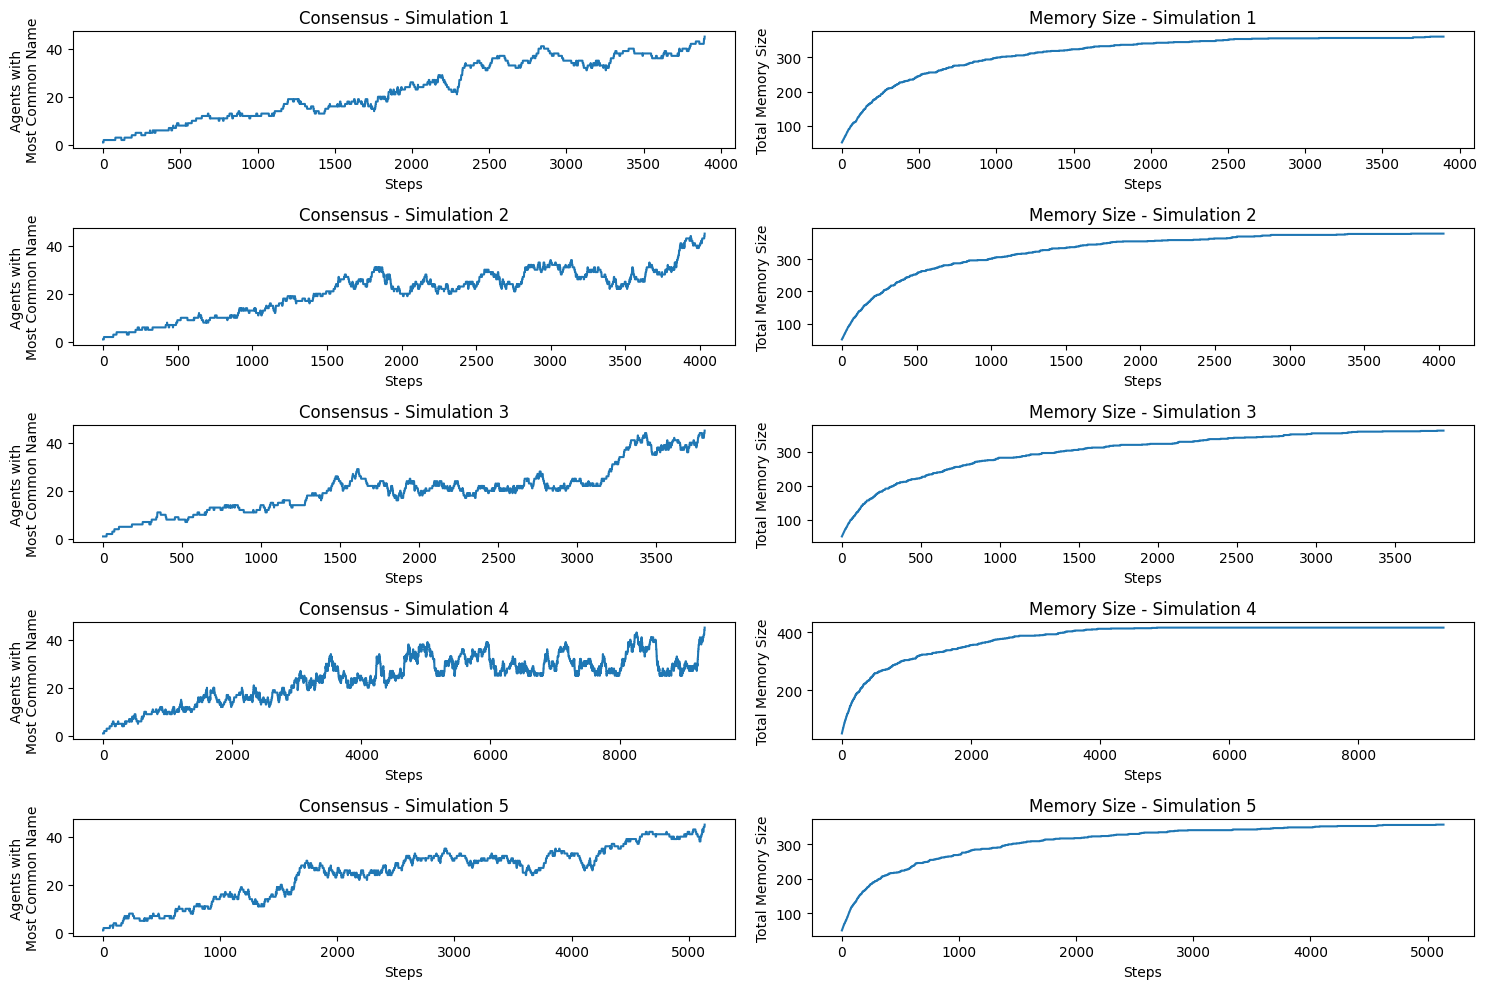

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm  # Import thư viện tqdm

class NamingGame:
    def __init__(self, num_agents=50, memory_spaces=10, max_steps=1000000,
                 neighborhood_size=2, random_connections=10):
        self.num_agents = num_agents
        self.memory_spaces = memory_spaces
        self.max_steps = max_steps
        self.neighborhood_size = neighborhood_size

        # Initialize agents with empty memories
        self.agents = [[] for _ in range(num_agents)]

        # Track used names
        self.used_names = set()

        # Initialize adjacency matrix for the network
        self.network = self.initialize_network(random_connections)

    def initialize_network(self, random_connections):
        # Create base lattice network
        network = np.zeros((self.num_agents, self.num_agents))
        for i in range(self.num_agents):
            for j in range(-self.neighborhood_size, self.neighborhood_size + 1):
                if j != 0:
                    neighbor = (i + j) % self.num_agents
                    network[i][neighbor] = 1
                    network[neighbor][i] = 1

        # Add random connections
        added_connections = 0
        while added_connections < random_connections:
            i = random.randint(0, self.num_agents - 1)
            j = random.randint(0, self.num_agents - 1)
            if i != j and network[i][j] == 0:
                network[i][j] = 1
                network[j][i] = 1
                added_connections += 1

        return network

    def get_neighbors(self, agent_idx):
        # Get all connected neighbors based on adjacency matrix
        return np.where(self.network[agent_idx] == 1)[0]

    def generate_unique_name(self):
        # Generate a unique name
        while True:
            name = f"N{len(self.used_names)}"
            if name not in self.used_names:
                self.used_names.add(name)
                return name

    def initialize_agents(self):
        # Each agent creates a unique initial name
        for i in range(self.num_agents):
            self.agents[i].append(self.generate_unique_name())

    def select_agents(self):
        # Select speaker randomly and hearer from neighbors
        speaker = random.randint(0, self.num_agents - 1)
        neighbors = self.get_neighbors(speaker)
        hearer = np.random.choice(neighbors)
        return speaker, hearer

    def run_simulation(self):
        self.initialize_agents()

        steps_data = []
        total_memory_data = []
        consensus_names = []
        convergence_step = -1
        convergence_name = None

        # Use tqdm to track progress
        for step in tqdm(range(self.max_steps), desc="Running Simulation"):
            # Select speaker and hearer
            speaker, hearer = self.select_agents()

            # If speaker's memory is empty, create a new name
            if not self.agents[speaker]:
                self.agents[speaker].append(self.generate_unique_name())

            # Select a name from speaker's first memory space
            name = self.agents[speaker][0]

            # Hearer update
            if name in self.agents[hearer]:
                # Move successful name to front for both agents
                self.agents[hearer].remove(name)
                self.agents[hearer].insert(0, name)

                # Speaker update
                self.agents[speaker].remove(name)
                self.agents[speaker].insert(0, name)
            else:
                # Add name to hearer's memory if space available
                if len(self.agents[hearer]) < self.memory_spaces:
                    self.agents[hearer].append(name)
                else:
                    # If memory full, replace last name
                    self.agents[hearer].pop()
                    self.agents[hearer].append(name)

            # Track consensus and memory size
            first_names = [agent[0] if agent else None for agent in self.agents]
            unique_names = set(first_names)
            most_common_name = max(unique_names,
                                 key=lambda x: first_names.count(x))
            consensus_count = first_names.count(most_common_name)

            steps_data.append(step)
            consensus_names.append(consensus_count)
            total_memory_data.append(sum(len(agent) for agent in self.agents))

            # Check for 90% consensus
            if consensus_count >= 0.9 * self.num_agents and convergence_step == -1:
                convergence_step = step
                convergence_name = most_common_name
                print(f"\nHội tụ tại bước {convergence_step + 1} với tên '{convergence_name}'")
                break

        return steps_data, consensus_names, total_memory_data

# Run 5 simulations
np.random.seed(42)
num_sims = 5

plt.figure(figsize=(15, 10))

for i in range(num_sims):
    naming_game = NamingGame()
    steps, consensus, memory_size = naming_game.run_simulation()

    # Plot consensus for this simulation
    plt.subplot(num_sims, 2, 2*i + 1)
    plt.plot(steps, consensus)
    plt.title(f'Consensus - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Agents with\nMost Common Name')

    # Plot memory size for this simulation
    plt.subplot(num_sims, 2, 2*i + 2)
    plt.plot(steps, memory_size)
    plt.title(f'Memory Size - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Total Memory Size')

plt.tight_layout()
plt.show()



# 3.1 Optimize

Hearer Memory Update Method:
+ Store the most frequently used names at the top of the list, reducing the chance of replacement.
+ Instead of removing the last name, remove the least popular name in the entire system.
Speaker Name Selection:

Prioritize the most popular name (most frequently appearing).
+ If no popular name exists, choose the first name in memory. (Ensure only a maximum of 1 popular name per step).

Interaction Method:
+ Each step selects 3 people, interact in a circular manner: Person 1 speaks to Person 2, Person 2 speaks to Person 3, Person 3 speaks to Person 1.


Running Simulation:   0%|          | 92/1000000 [00:00<01:48, 9176.16it/s]



Hội tụ tại bước 93 với tên 'N15'


Running Simulation:   0%|          | 66/1000000 [00:00<02:07, 7863.87it/s]



Hội tụ tại bước 67 với tên 'N15'


Running Simulation:   0%|          | 87/1000000 [00:00<02:12, 7531.72it/s]


Hội tụ tại bước 88 với tên 'N15'



Running Simulation:   0%|          | 82/1000000 [00:00<01:57, 8492.59it/s]



Hội tụ tại bước 83 với tên 'N15'


Running Simulation:   0%|          | 97/1000000 [00:00<01:36, 10414.90it/s]



Hội tụ tại bước 98 với tên 'N15'


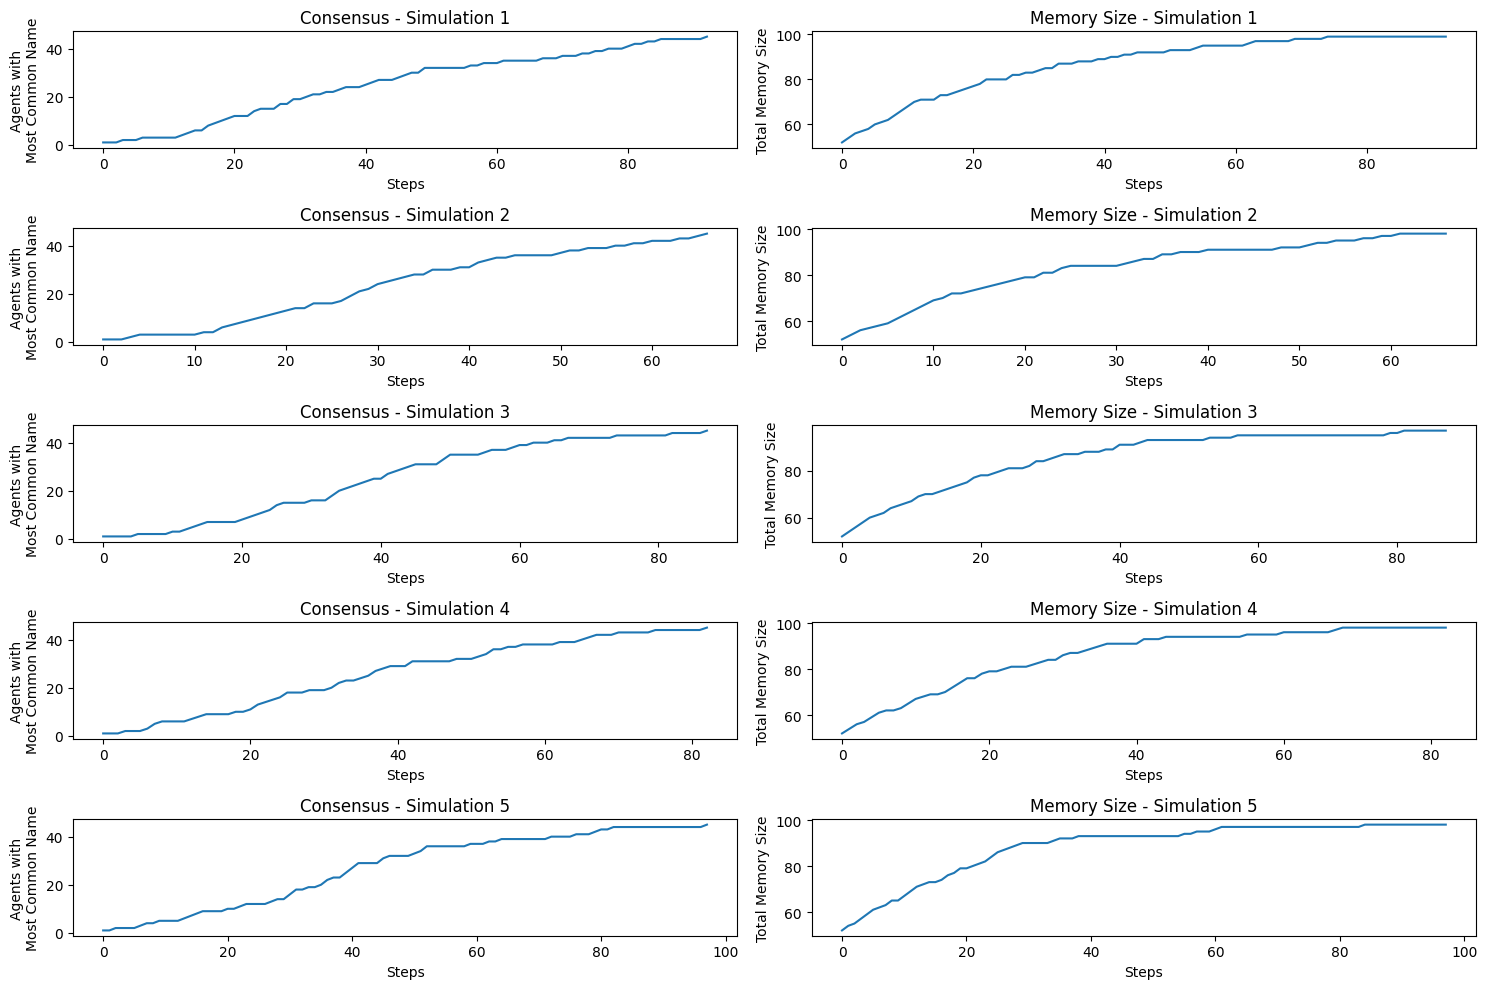

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm  # Import thư viện tqdm

class NamingGame:
    def __init__(self, num_agents=50, memory_spaces=10, max_steps=1000000,
                 neighborhood_size=2, random_connections=10):
        self.num_agents = num_agents
        self.memory_spaces = memory_spaces
        self.max_steps = max_steps
        self.neighborhood_size = neighborhood_size

        # Initialize agents with empty memories
        self.agents = [[] for _ in range(num_agents)]

        # Track used names
        self.used_names = set()

        # Initialize adjacency matrix for the network
        self.network = self.initialize_network(random_connections)

    def initialize_network(self, random_connections):
        # Create base lattice network
        network = np.zeros((self.num_agents, self.num_agents))
        for i in range(self.num_agents):
            for j in range(-self.neighborhood_size, self.neighborhood_size + 1):
                if j != 0:
                    neighbor = (i + j) % self.num_agents
                    network[i][neighbor] = 1
                    network[neighbor][i] = 1

        # Add random connections
        added_connections = 0
        while added_connections < random_connections:
            i = random.randint(0, self.num_agents - 1)
            j = random.randint(0, self.num_agents - 1)
            if i != j and network[i][j] == 0:
                network[i][j] = 1
                network[j][i] = 1
                added_connections += 1

        return network

    def get_neighbors(self, agent_idx):
        # Get all connected neighbors based on adjacency matrix
        return np.where(self.network[agent_idx] == 1)[0]

    def generate_unique_name(self):
        # Generate a unique name
        while True:
            name = f"N{len(self.used_names)}"
            if name not in self.used_names:
                self.used_names.add(name)
                return name

    def initialize_agents(self):
        # Each agent creates a unique initial name
        for i in range(self.num_agents):
            self.agents[i].append(self.generate_unique_name())

    def select_agents(self):
        # Select 3 agents for circular interaction
        agents = random.sample(range(self.num_agents), 3)
        return agents[0], agents[1], agents[2]  # speaker, hearer 1, hearer 2

    def get_most_common_name(self):
        # Find the most common name among all agents' first names
        first_names = [agent[0] if agent else None for agent in self.agents]
        name_counts = {name: first_names.count(name) for name in set(first_names)}
        # Return the name with highest count, if more than one, return the one with the smallest index
        return max(name_counts, key=lambda x: name_counts[x])

    def update_hearer_memory(self, hearer, name):
        # Update hearer's memory, move most common name to the front
        if name in self.agents[hearer]:
            # Move the name to the front of hearer's memory
            self.agents[hearer].remove(name)
            self.agents[hearer].insert(0, name)
        else:
            # Add name to hearer's memory if space is available
            if len(self.agents[hearer]) < self.memory_spaces:
                self.agents[hearer].append(name)
            else:
                # Remove least common name
                all_names = [n[0] for n in self.agents if n]
                least_common_name = min(set(all_names), key=all_names.count)
                for agent in self.agents:
                    if least_common_name in agent:
                        agent.remove(least_common_name)
                # Add the new name
                self.agents[hearer].append(name)

    def run_simulation(self):
        self.initialize_agents()

        steps_data = []
        total_memory_data = []
        consensus_names = []
        convergence_step = -1
        convergence_name = None

        # Use tqdm to track progress
        for step in tqdm(range(self.max_steps), desc="Running Simulation"):
            # Select three agents for circular interaction
            speaker, hearer1, hearer2 = self.select_agents()

            # Speaker prefers the most common name or chooses the first name if none is common
            most_common_name = self.get_most_common_name()
            name_to_speak = most_common_name if most_common_name else self.agents[speaker][0]

            # Update the hearers' memory
            self.update_hearer_memory(hearer1, name_to_speak)
            self.update_hearer_memory(hearer2, name_to_speak)

            # Track consensus and memory size
            first_names = [agent[0] if agent else None for agent in self.agents]
            unique_names = set(first_names)
            most_common_name = max(unique_names, key=lambda x: first_names.count(x))
            consensus_count = first_names.count(most_common_name)

            steps_data.append(step)
            consensus_names.append(consensus_count)
            total_memory_data.append(sum(len(agent) for agent in self.agents))

            # Check for 90% consensus
            if consensus_count >= 0.9 * self.num_agents and convergence_step == -1:
                convergence_step = step
                convergence_name = most_common_name
                print(f"\nHội tụ tại bước {convergence_step + 1} với tên '{convergence_name}'")
                break

        return steps_data, consensus_names, total_memory_data

# Run 5 simulations
np.random.seed(42)
num_sims = 5

plt.figure(figsize=(15, 10))

for i in range(num_sims):
    naming_game = NamingGame()
    steps, consensus, memory_size = naming_game.run_simulation()

    # Plot consensus for this simulation
    plt.subplot(num_sims, 2, 2*i + 1)
    plt.plot(steps, consensus)
    plt.title(f'Consensus - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Agents with\nMost Common Name')

    # Plot memory size for this simulation
    plt.subplot(num_sims, 2, 2*i + 2)
    plt.plot(steps, memory_size)
    plt.title(f'Memory Size - Simulation {i+1}')
    plt.xlabel('Steps')
    plt.ylabel('Total Memory Size')

plt.tight_layout()
plt.show()
